# ARM and Networking

## Introduction to ARM

Association rule analysis was first proposed to obtain the potential association between different commodities in transactions. This technology uses the expression of set. First, we define item set as $I=\{i_1,i_2,\cdots,i_p\}$, where each $i_k$ can be viewed as an item (commodity). Second, we define transaction set as $D=\{T_1,T_2,\cdots,T_d\}$ where each $T_k$ is a subset of I. The aim of our analysis is to obtain certain rules from D.


For a single project set, we define support to measure the possibility of the occurrence of the project set. The definition of support is similar to Bayesian probability, which is:

$$support(X)=\frac{\vert \{T_i|X \subseteq T_i\}\vert}{\vert D\vert}$$ 

The support here can be understood as the possibility of the occurrence of such a project portfolio (commodity portfolio) as X, and it can also be understood as the possibility of such a group of commodities as X becoming complementary products to each other. For rules like $X \rightarrow Y$, we can calculate the similar supporting value by $\frac{\vert \{T_i|X \cup Y \subseteq T_i\}\vert}{\vert D\vert}$. This can predict the probability of Y's commodity combination, based on the condition that X's combination has been found.


In the algorithm, we set the minimum confidence threshold to give the basic item set, which is to prevent invalid sets, such as single element sets. At the same time, for the second type of rules (transitive rules), we use the maximum support method to generate the most effective association rules. The specific construction method uses the FP tree construction method to generate frequent item sets from the bottom up, sort by decreasing support, and obtain the combination of maximum support that meets the minimum threshold.

## Preparations

In This page, I will use cleaned text data to do the ARM and Networking modeling. 
The data can be find here:\
https://github.com/anly501/anly-501-project-WilliamChuFCB/tree/main/data/cleaned_data


First import necessary packages:

In [ ]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from apyori import apriori
import networkx as nx 


Define some global variables:

In [ ]:
#USER PARAM
input_path			=	'free_mtr_text_data.csv'
compute_sentiment 	=	True		
sentiment    		=	[]			#average sentiment of each chunck of text 
ave_window_size		=	250			#size of scanning window for moving average
					

#OUTPUT FILE
output='transactions.txt'
if os.path.exists(output): os.remove(output)

#INITIALIZE
lemmatizer 	= 	WordNetLemmatizer()
ps 			=	PorterStemmer()
sia 		= 	SentimentIntensityAnalyzer()

#ADD MORE
stopwords	=	stopwords.words('english')
add=['mr','mrs','wa','dr','said','back','could','one','looked','like','know','around','dont']
for sp in add: stopwords.append(sp)

Read in the csv file:

In [ ]:
df=pd.read_csv("free_mtr_text_data.csv")
freeway_list=list(df.loc[df.label=="freeway","text"])
metro_list=list(df.loc[df.label=="metro","text"])

## Data cleaning and sentiment analysis

In this part, I will clean the data and also compute the average sentiment of text data that labeled "freeway" or "metro" in order to compare the sentiment of two groups of tweets.

First define a funtion to further clean the text data and output the average sentiment value of all the tweets about "freeway".

In [ ]:
def read_and_clean(file):
	global sentiment 

	#CLEAN AND LEMMATIZE
	keep='0123456789abcdefghijklmnopqrstuvwxy';

	new_sentences=[]; vocabulary=[]
	for sentence in file:
		new_sentence=''

		# REBUILD LEMITIZED SENTENCE
		for word in sentence.split():
			
			#ONLY KEEP CHAR IN "keep"
			tmp2=''
			for char in word: 
				if(char in keep): 
					tmp2=tmp2+char
				else:
					tmp2=tmp2+' '
			word=tmp2
            
			tmp=lemmatizer.lemmatize(word)
			new_word=tmp

			#REMOVE WHITE SPACES
			new_word=new_word.replace(' ', '')

			#BUILD NEW SENTANCE BACK UP
			if( new_word not in stopwords):
				if(new_sentence==''):
					new_sentence=new_word
				else:
					new_sentence=new_sentence+','+new_word
				if(new_word not in vocabulary): vocabulary.append(new_word)

		#SAVE (LIST OF LISTS)		
		new_sentences.append(new_sentence.split(","))
		
		#SIA
		if(compute_sentiment):
            
			s=sia.polarity_scores(new_sentence.replace(',',' '))
			sentiment.append([s['neg'],s['neu'],s['pos'],s['compound']])
            
		#SAVE SENTANCE TO OUTPUT FILE
		if(len(new_sentence.split(','))>2):
			f = open(output, "a")
			f.write(new_sentence+"\n")
			f.close()

	sentiment=np.array(sentiment)
	print("TOTAL AVERAGE SENTIMENT:",np.mean(sentiment,axis=0))
	print("VOCAB LENGTH",len(vocabulary))
	return new_sentences

transactions=read_and_clean(freeway_list)
print(transactions[0:5])

TOTAL AVERAGE SENTIMENT: [ 0.10607972  0.71527322  0.17864706 -0.01102825]
VOCAB LENGTH 7949
[['boenau', 'rfsdfhsfbhwsfgb', 'least', 'ca', 'expressway', 'might', 'limited', 'access', 'still', 'grade', 'inte', 'http', 'co', 'dibmsr9b5b'], ['acakamadu', 'sudden', 'urge', 'go', 'san', 'jose', 'talk', 'cultural', 'impact', 'song', 'unfortunately', 'san', 'jo', 'http', 'co', 'nujnntbhx0'], ['alinaaai', 'yes', 'girl', 'freeway', 'system', 'wack', 'lol'], ['multi', 'adsbx', 'circling', 'alert', 'time', 'sat', 'dec', '10', '18', '26', '41', '2022', 'n962ms', 'likely', 'circling', 'fl23', '4nm', 'http', 'co', 'dfrvrvjiqt'], ['ghettosmosh', 'almost', 'crashed', 'fucking', 'whip', 'freeway', 'listening', 'legend', 'plug', 'feel', 'owed', 'methinks']]


According to the average sentiment vector, negative coefficient is 0.11 while positive coefficient is 0.18. At the same time, neutral coefficient is 0.72, which is much higher than others. 

Then compute the sentiment vector of tweets about "metro"

In [ ]:
sentiment    		=	[]
transactions1=read_and_clean(metro_list)
print(transactions1[0:5])

TOTAL AVERAGE SENTIMENT: [0.06102724 0.8457798  0.0931941  0.06118218]
VOCAB LENGTH 4436
[['downed', 'plonk', 'calais', 'bangkok', 'spanish', 'language', 'tickle', 'ear', 'baroque', 'least', 'metro', 'http', 'co', 'tnoj5k3fg'], ['rt', 'lolita', 'tnie', 'railway', 'okaying', 'traffic', 'amp', 'power', 'block', 'bengaluru', 'metro', 'start', 'process', 'erecting', 'open', 'web', 'girder', '65'], ['rt', 'metroopinion', 'another', 'knockout', 'defeat', 'call', 'growing', 'sack', 'gareth', 'southgate', 'evolution', 'revolution', 'solution'], ['rt', 'metrouk', 'breaking', 'reported', 'national', 'grid', 'fired', 'two', 'emergency', 'use', 'coal', 'generator', 'amid', 'cold', 'weather', 'http', 'co'], ['rt', 'mahilmass', 'varisu', 'metro', 'train', 'promotion', 'http', 'co', '2elrimnwar']]


From this result, we can find that the size relation of negative, positive and neutral coefficients is the same as "freeway". However, the negative and positive coefficients are smaller while neutral coefficent gets even larger. This means that people include more emotion to the tweets about "freeway" than about "metro". This possibly because people may encounter traffic jams and car accidents on the freeway but not in metro.

Next, use moving average plot to visualize the sentiment value among all the tweets about "freeway":

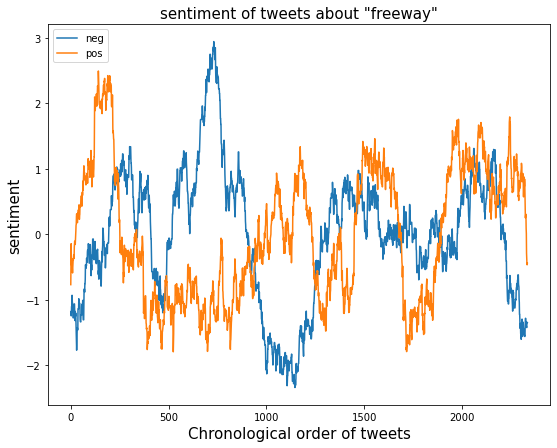

In [ ]:
def moving_ave(y,w=100):

	l=len(y)
	mean = []
	i=0
	while(i+w<=l):
		mean.append(np.mean(y[i:i+w]))
		i=i+1
	return mean

neg=moving_ave(sentiment[:,0], ave_window_size)
pos=moving_ave(sentiment[:,2], ave_window_size)

neg=(neg-np.mean(neg))/np.std(neg)
pos=(pos-np.mean(pos))/np.std(pos)

fig,axes=plt.subplots(1,1,figsize=(9,7))
FS=15
plt.plot(neg, label = 'neg')
plt.plot(pos, label = 'pos')
plt.legend(loc='upper left')
plt.title('sentiment of tweets about "freeway"', fontsize=FS)
plt.xlabel('Chronological order of tweets', fontsize=FS)
plt.ylabel('sentiment', fontsize=FS)
plt.show()

We can see that the average sentiment fluctuates by time.

## ARM and networking modeling

First define a function to re-format the output:

In [ ]:
def reformat_results(results):

    #CLEAN-UP RESULTS 
    keep=[]
    for i in range(0,len(results)):
        # print("=====================================")
        # print(results[i])
        # print(len(list(results[i])))
        for j in range(0,len(list(results[i]))):
            # print(results)
            if(j>1):
                for k in range(0,len(list(results[i][j]))):
                    if(len(results[i][j][k][0])!=0):
                        #print(len(results[i][j][k][0]),results[i][j][k][0])
                        rhs=list(results[i][j][k][0])
                        lhs=list(results[i][j][k][1])
                        conf=float(results[i][j][k][2])
                        lift=float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
                        # keep.append()
            if(j==1):
                supp=results[i][j]

    return pd.DataFrame(keep, columns =["rhs","lhs","supp","conf","supp x conf","lift"])


Then define a utility function to convert to NetworkX object:

In [ ]:
def convert_to_network(df):
    print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    return G

Define another function to plot the NetworkX object:

In [ ]:
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    edgecolors="black",
    edge_color=colors_e,
    node_size=2000,
    linewidths=2,
    font_size=8,
    font_color="white",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='Dracula')
    plt.show()


Train the ARM model and print the result:

In [ ]:
print("Transactions:",pd.DataFrame(transactions))
results = list(apriori(transactions, min_support = 0.05, min_confidence=0.05, min_length=1, max_length=5))   
pd_results=reformat_results(results)
print(len(results))

Transactions:                0                1         2         3             4        5   \
0          boenau  rfsdfhsfbhwsfgb     least        ca    expressway    might   
1       acakamadu           sudden      urge        go           san     jose   
2        alinaaai              yes      girl   freeway        system     wack   
3           multi            adsbx  circling     alert          time      sat   
4     ghettosmosh           almost   crashed   fucking          whip  freeway   
...           ...              ...       ...       ...           ...      ...   
2579           20             east   atlanta       see  neighborhood   people   
2580         ever            since     first       bmw            90    325is   
2581     cruising            exact   freeway     1930s        german   toward   
2582    briannawu             even   walking   grocery         store   across   
2583   congestion               n1   inbound  elevated       freeway   expect   

             

                rhs              lhs      supp      conf  supp x conf  \
0             [car]        [freeway]  0.053019  0.706186     0.037441   
1         [freeway]            [car]  0.053019  0.067289     0.003568   
2              [co]        [freeway]  0.323529  0.668265     0.216204   
3         [freeway]             [co]  0.323529  0.410609     0.132844   
4              [co]           [http]  0.483746  0.999201     0.483359   
5            [http]             [co]  0.483746  0.996810     0.482203   
6              [co]           [lane]  0.054954  0.113509     0.006238   
7            [lane]             [co]  0.054954  0.706468     0.038823   
8         [freeway]           [http]  0.323916  0.411100     0.133162   
9            [http]        [freeway]  0.323916  0.667464     0.216203   
10        [freeway]           [lane]  0.068498  0.086935     0.005955   
11           [lane]        [freeway]  0.068498  0.880597     0.060320   
12        [freeway]             [rt]  0.077786  0.0

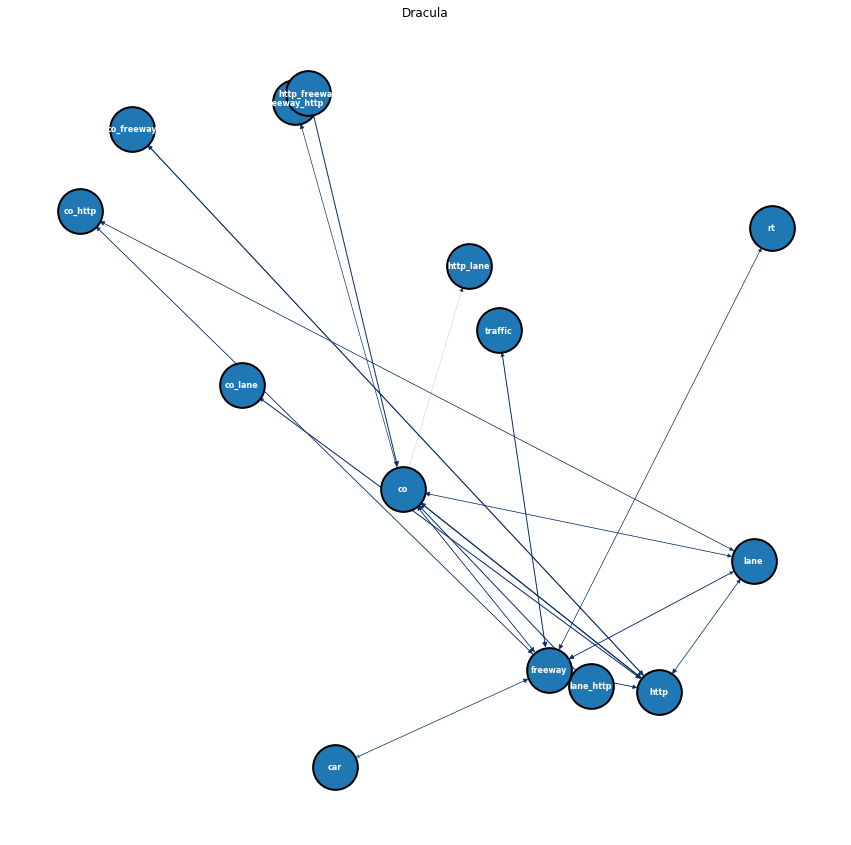

In [ ]:
G=convert_to_network(pd_results)
plot_network(G)